***Problem Statement :***
- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.

***Data Description :***
 The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

- ID --Unique ID
- Balance--Number of miles eligible for award travel
- Qual_mile--Number of miles counted as qualifying for Topflight status
- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
- 1 = under 5,000
- 2 = 5,000 - 10,000
- 3 = 10,001 - 25,000
- 4 = 25,001 - 50,000
- 5 = over 50,000
- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
- Bonus_trans--Number of non-flight bonus transactions in the past 12 months
- Flight_miles_12mo--Number of flight miles in the past 12 months
- Flight_trans_12--Number of flight transactions in the past 12 months
- Days_since_enrolled--Number of days since enrolled in flier program
- Award--whether that person had award flight (free flight) or not




In [2]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as pe
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the given dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [4]:
# Showing first 5 rows of given dataset
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Renaming ID# & Award? column names
df.rename(columns={'ID#':'ID','Award?':'Award'}, inplace=True)

# Showing all column names 
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [6]:
# Creating "ID" column as index column
df.set_index("ID", inplace=True)

In [6]:
# Showing given dataset after renaming columns & creating index column
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# Dimensions of dataset
df.shape

(3999, 11)

In [8]:
# Checking for null values present in given dataset
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
# More information about given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [10]:
# Basic stats in given dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [8]:
# Correlation between each columns
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.0000,0.1087,0.3383,-0.0088,0.0352,0.4035,0.3249,0.2176,0.2557,0.2631,0.1785
Qual_miles,0.1087,1.0000,0.0079,-0.0139,-0.0078,0.0310,0.0507,0.1268,0.1440,0.0173,0.0953
cc1_miles,0.3383,0.0079,1.0000,-0.0682,0.0606,0.8252,0.6089,0.0374,0.0413,0.2308,0.3355
cc2_miles,-0.0088,-0.0139,-0.0682,1.0000,-0.0062,-0.0040,0.0644,0.0106,0.0283,-0.0058,0.0053
cc3_miles,0.0352,-0.0078,0.0606,-0.0062,1.0000,0.2041,0.0973,-0.0018,-0.0011,0.0108,0.0235
Bonus_miles,0.4035,0.0310,0.8252,-0.0040,0.2041,1.0000,0.6032,0.1835,0.1853,0.2104,0.3735
Bonus_trans,0.3249,0.0507,0.6089,0.0644,0.0973,0.6032,1.0000,0.3772,0.4324,0.1613,0.3339
Flight_miles_12mo,0.2176,0.1268,0.0374,0.0106,-0.0018,0.1835,0.3772,1.0000,0.8692,0.0373,0.2177
Flight_trans_12,0.2557,0.1440,0.0413,0.0283,-0.0011,0.1853,0.4324,0.8692,1.0000,0.0593,0.2479
Days_since_enroll,0.2631,0.0173,0.2308,-0.0058,0.0108,0.2104,0.1613,0.0373,0.0593,1.0000,0.1881


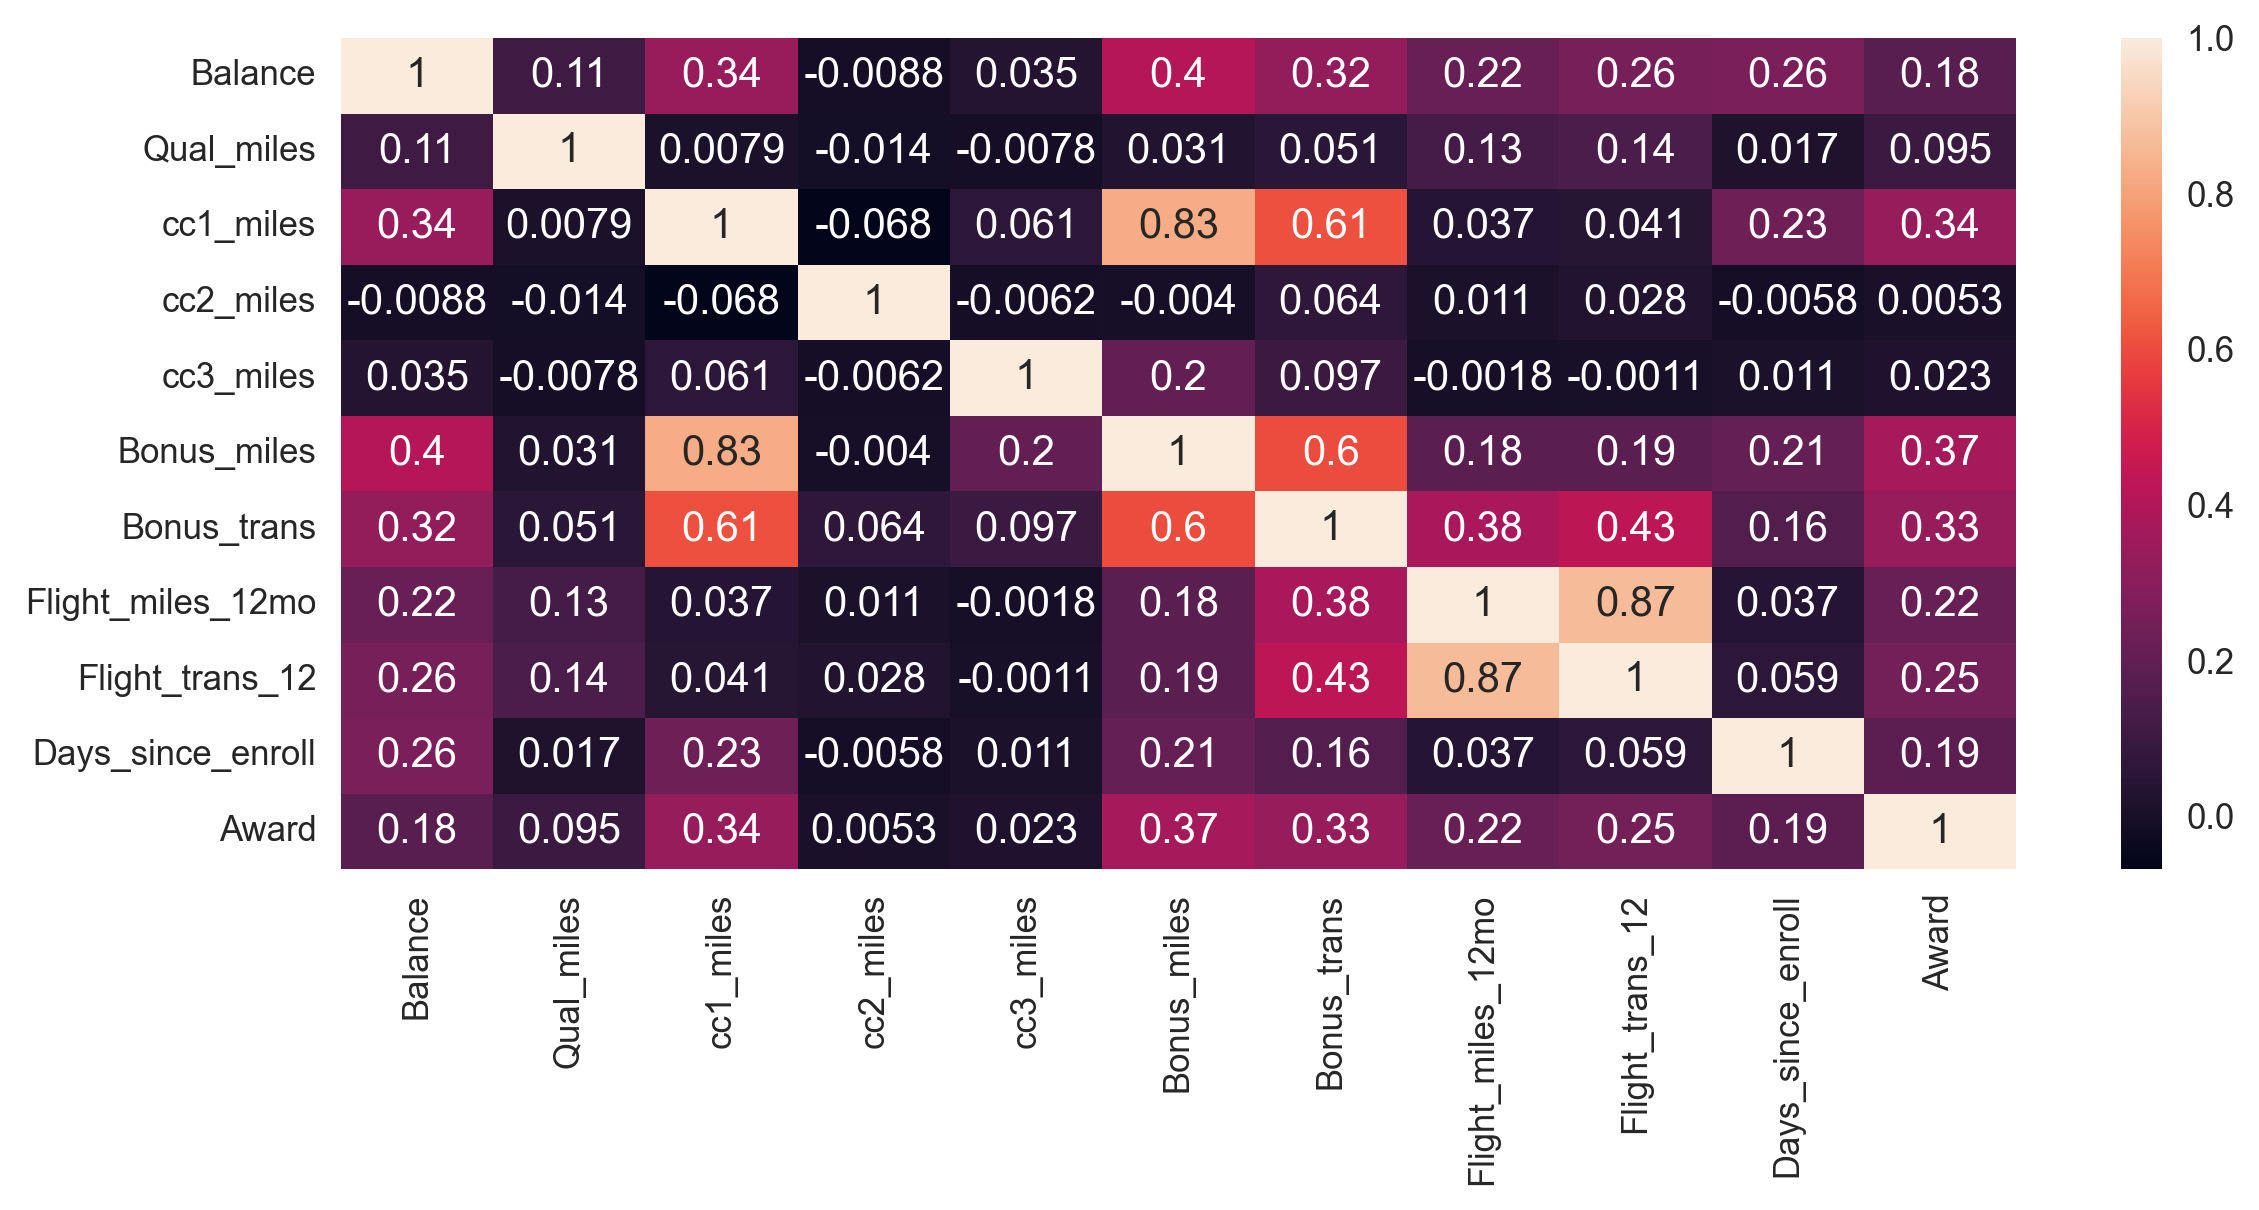

In [12]:
# Visualizing correlation with the help of heatmap
plt.figure(figsize=(10,5),dpi=250)
sns.heatmap(corr,annot=True)
plt.tight_layout()

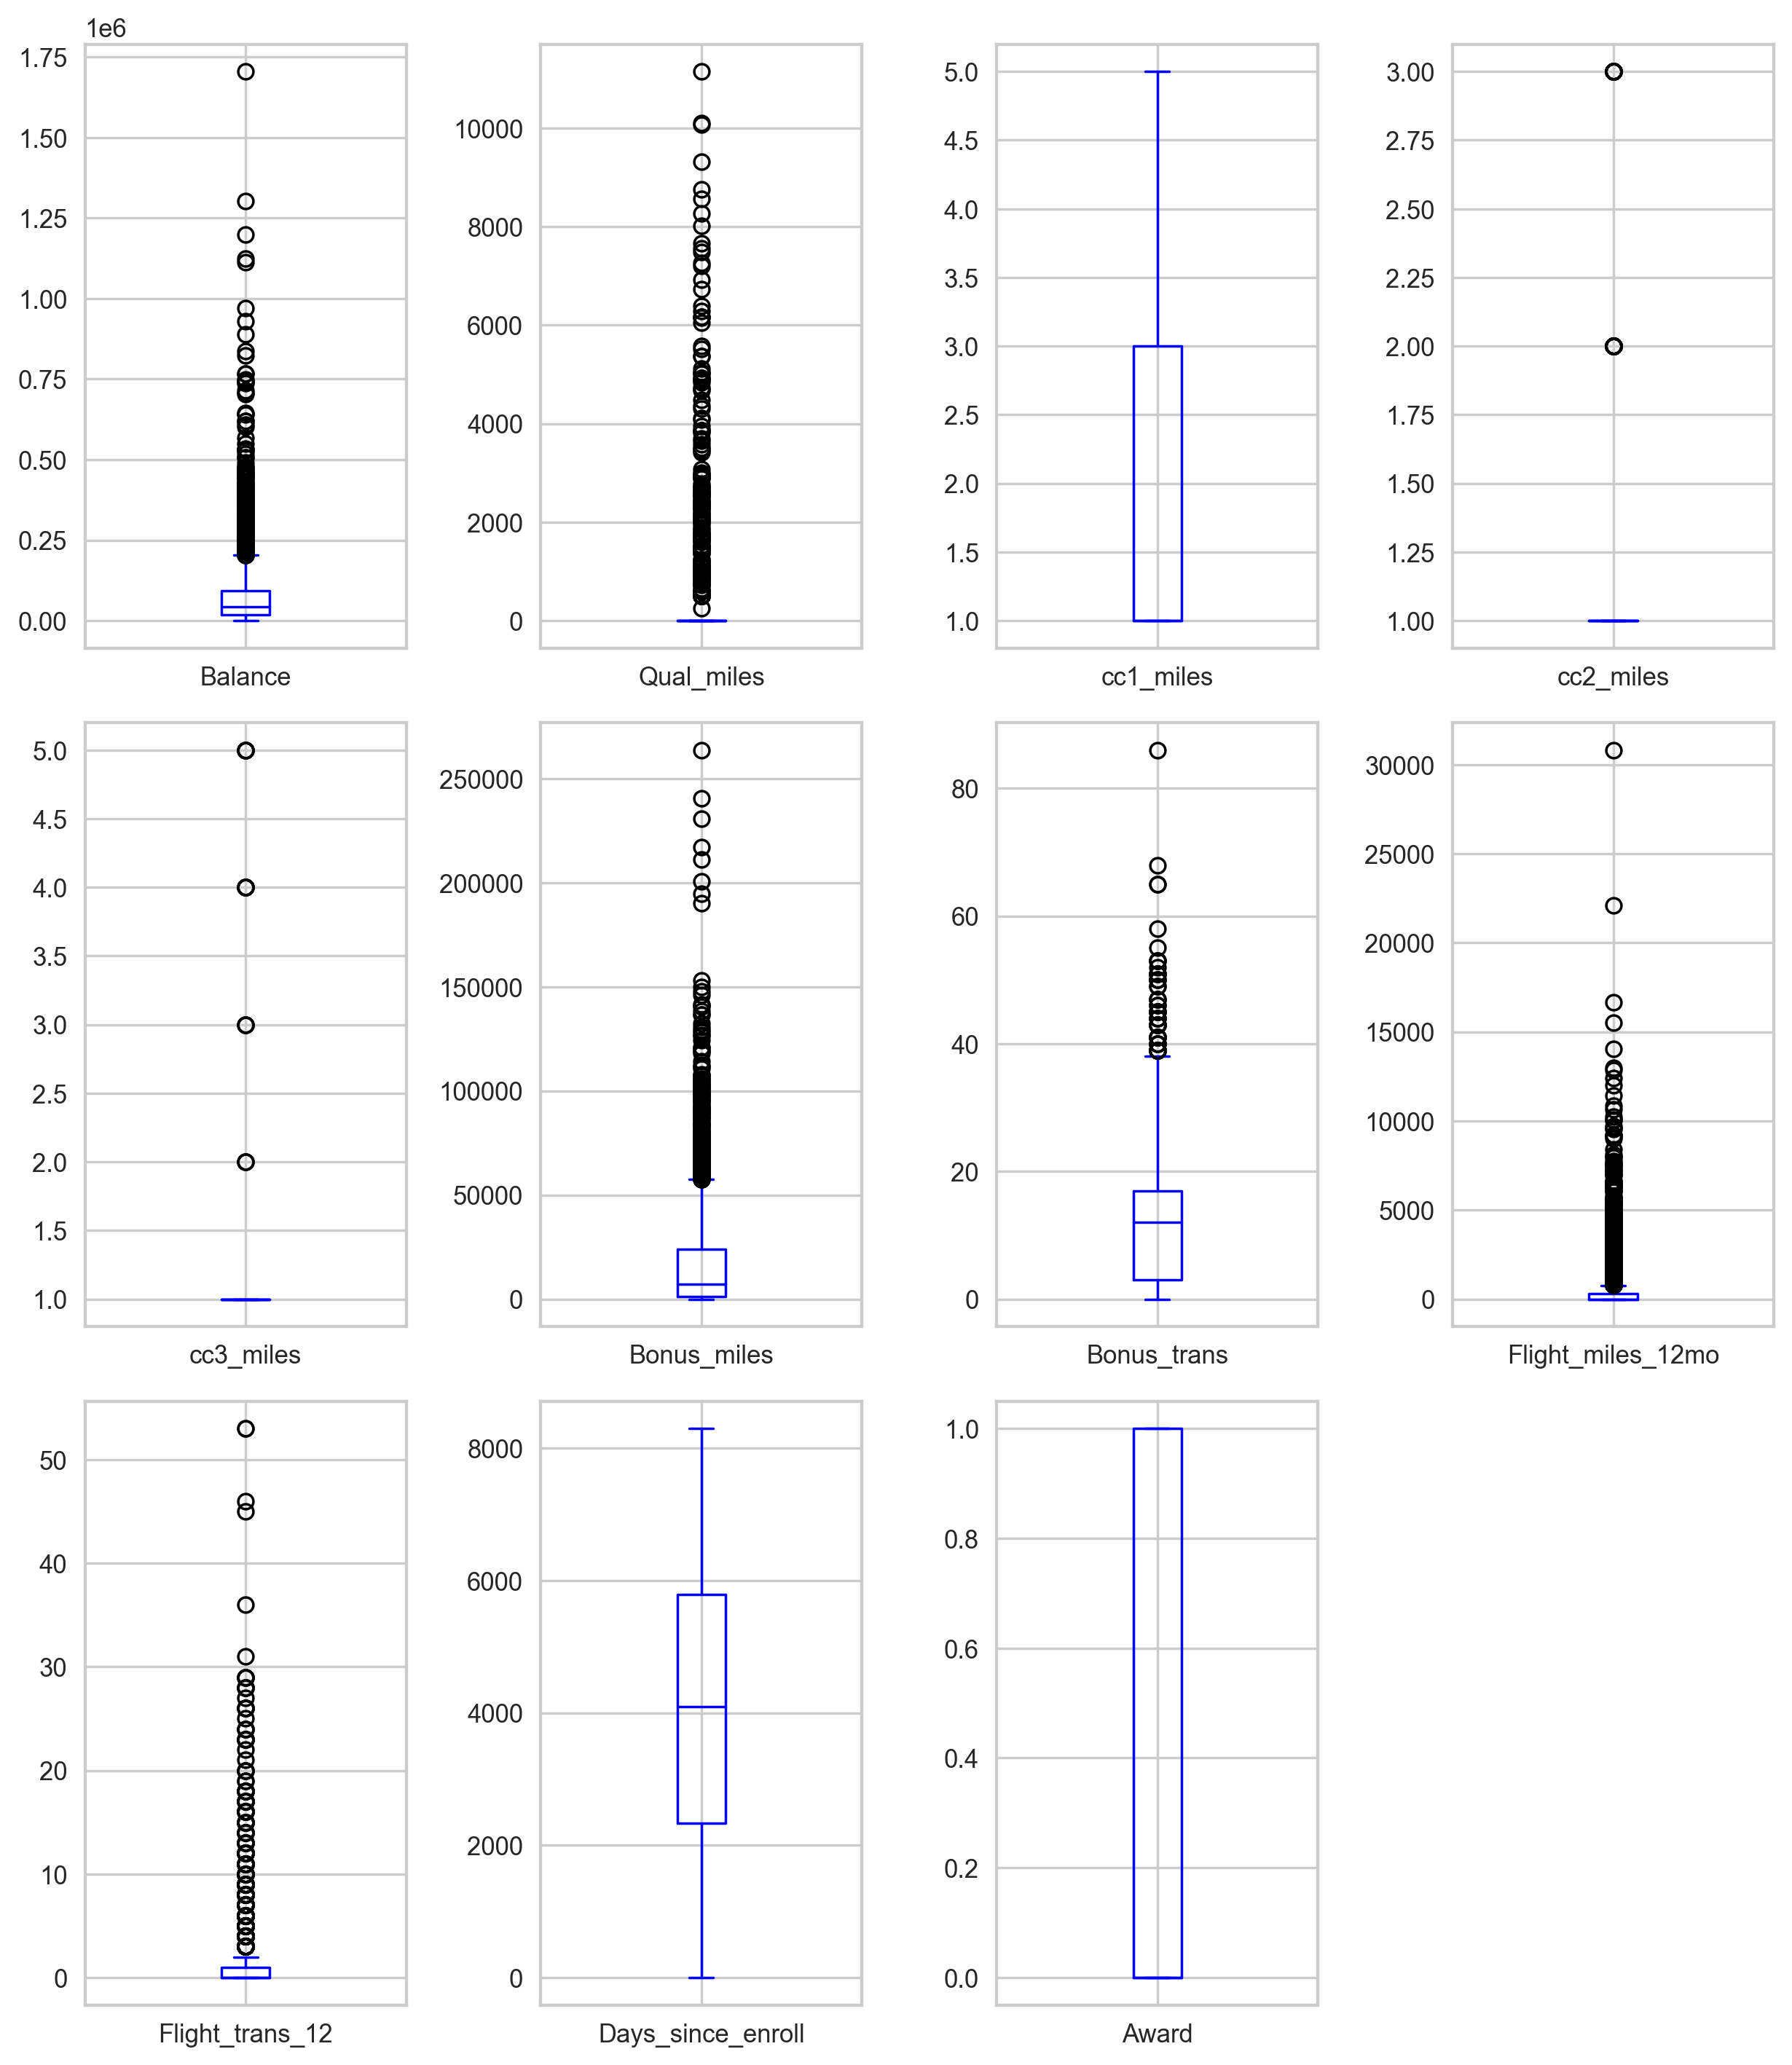

In [10]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots
plt.rcParams['figure.dpi']=250
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

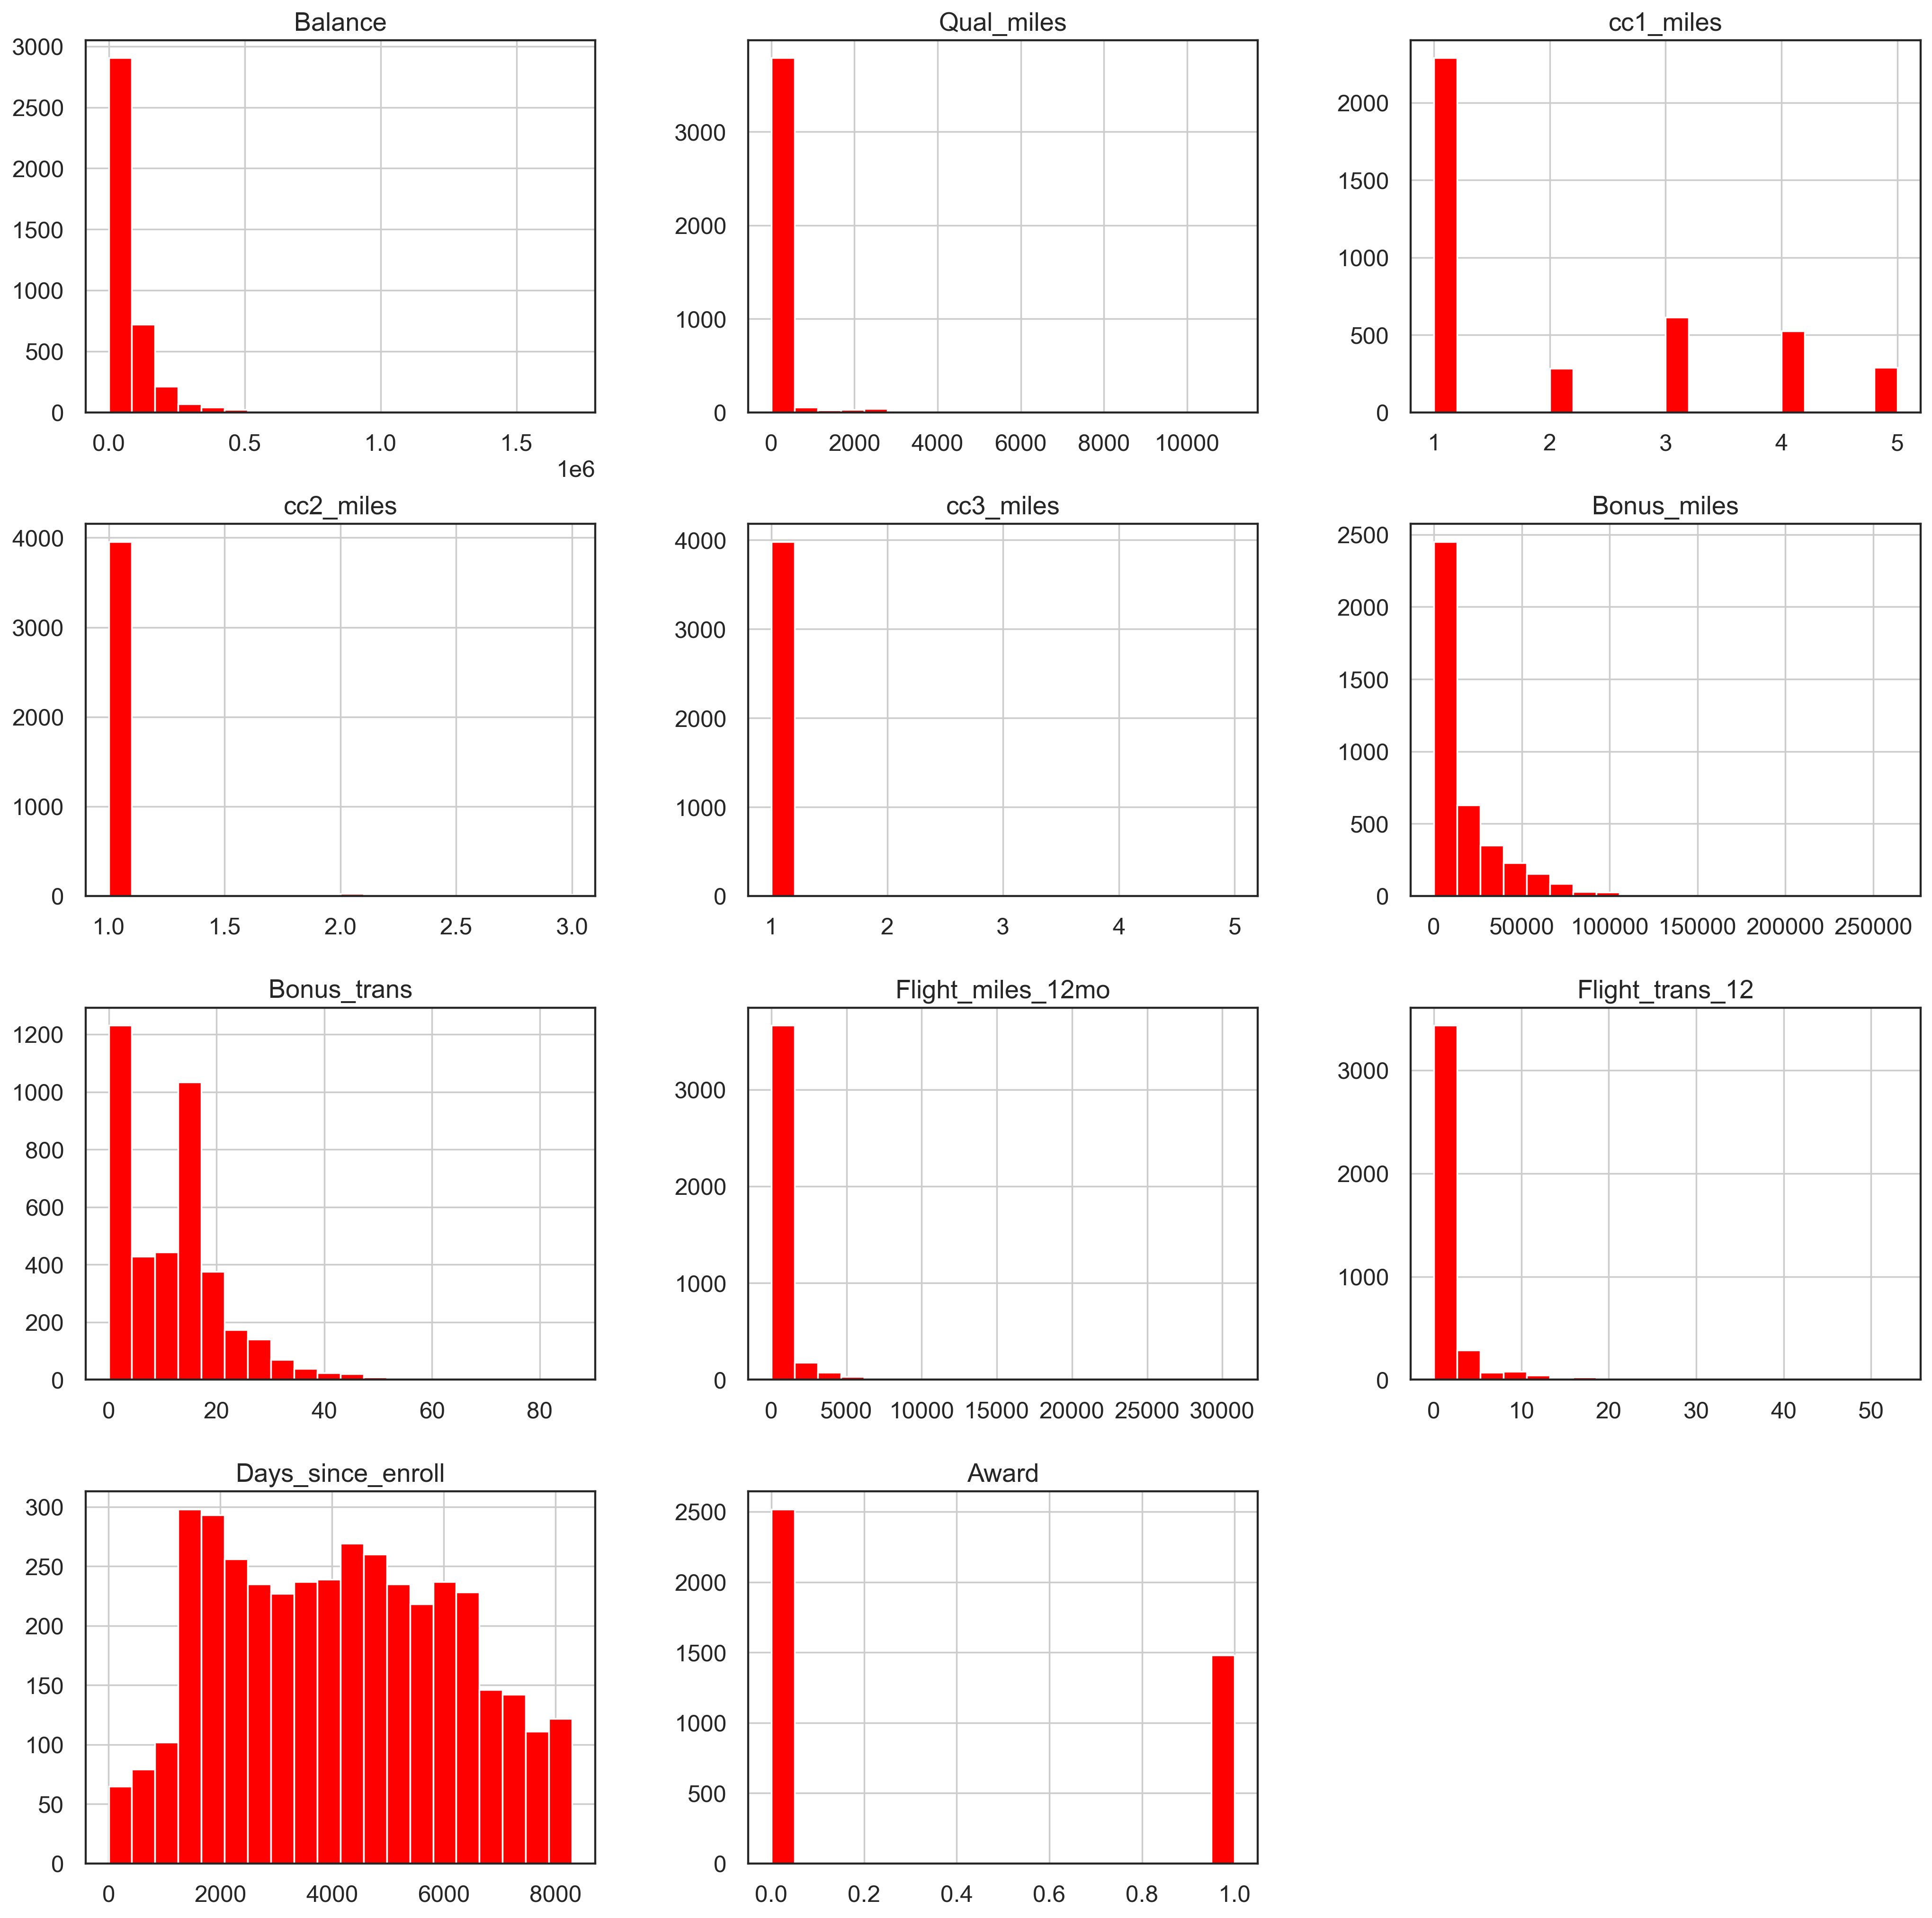

In [11]:
sns.set(style='white', font_scale=1.3, rc={'figure.figsize':(20,20)})
ax = df.hist(bins=20, color='red')

In [13]:
# Checking unique values present in "cc1_miles","cc2_miles","cc3_miles" columns
print("Unique values in cc1_miles :",df.cc1_miles.unique())
print("Unique values in cc2_miles :",df.cc2_miles.unique())
print("Unique values in cc3_miles :",df.cc3_miles.unique())

Unique values in cc1_miles : [1 4 3 2 5]
Unique values in cc2_miles : [1 2 3]
Unique values in cc3_miles : [1 3 2 4 5]


In [14]:
# Checking duplicates values present in given dataset
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [15]:
# Droping the duplicate value
df.drop_duplicates(inplace=True)

# Hierarchical Clustering :

In [16]:
# Creating a function for normalization of dataset
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

In [17]:
df_norm = df.columns
df_norm = normalize(df[df_norm])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


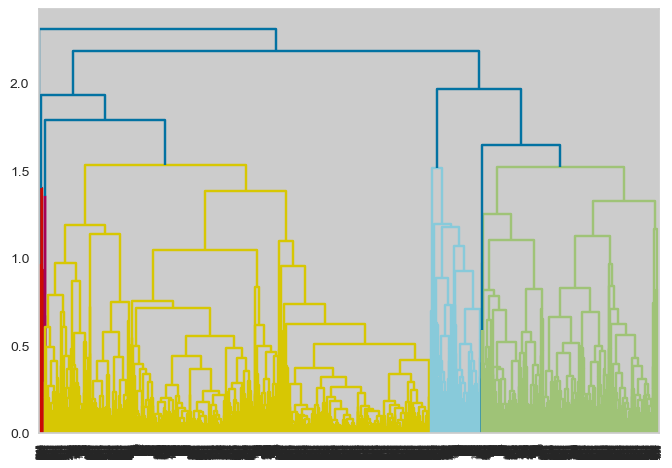

In [18]:
# Creating linkage & dendrogram
lk = hierarchy.linkage(df_norm, method='complete')
dendrogram = hierarchy.dendrogram(lk)

***Building hierarchical clustering model :***

In [19]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
ylable = hc.fit_predict(df_norm)
ylable

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [20]:
# Adding created hierarchical clusters in dataset
df['HC_cluster'] = ylable
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HC_cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [21]:
df.groupby('HC_cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
HC_cluster,,,,,,,,,,,
0,59814.340198,88.223762,1.703762,1.018614,1.011089,10328.971485,9.195644,230.532277,0.672475,3825.770297,0.003168
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


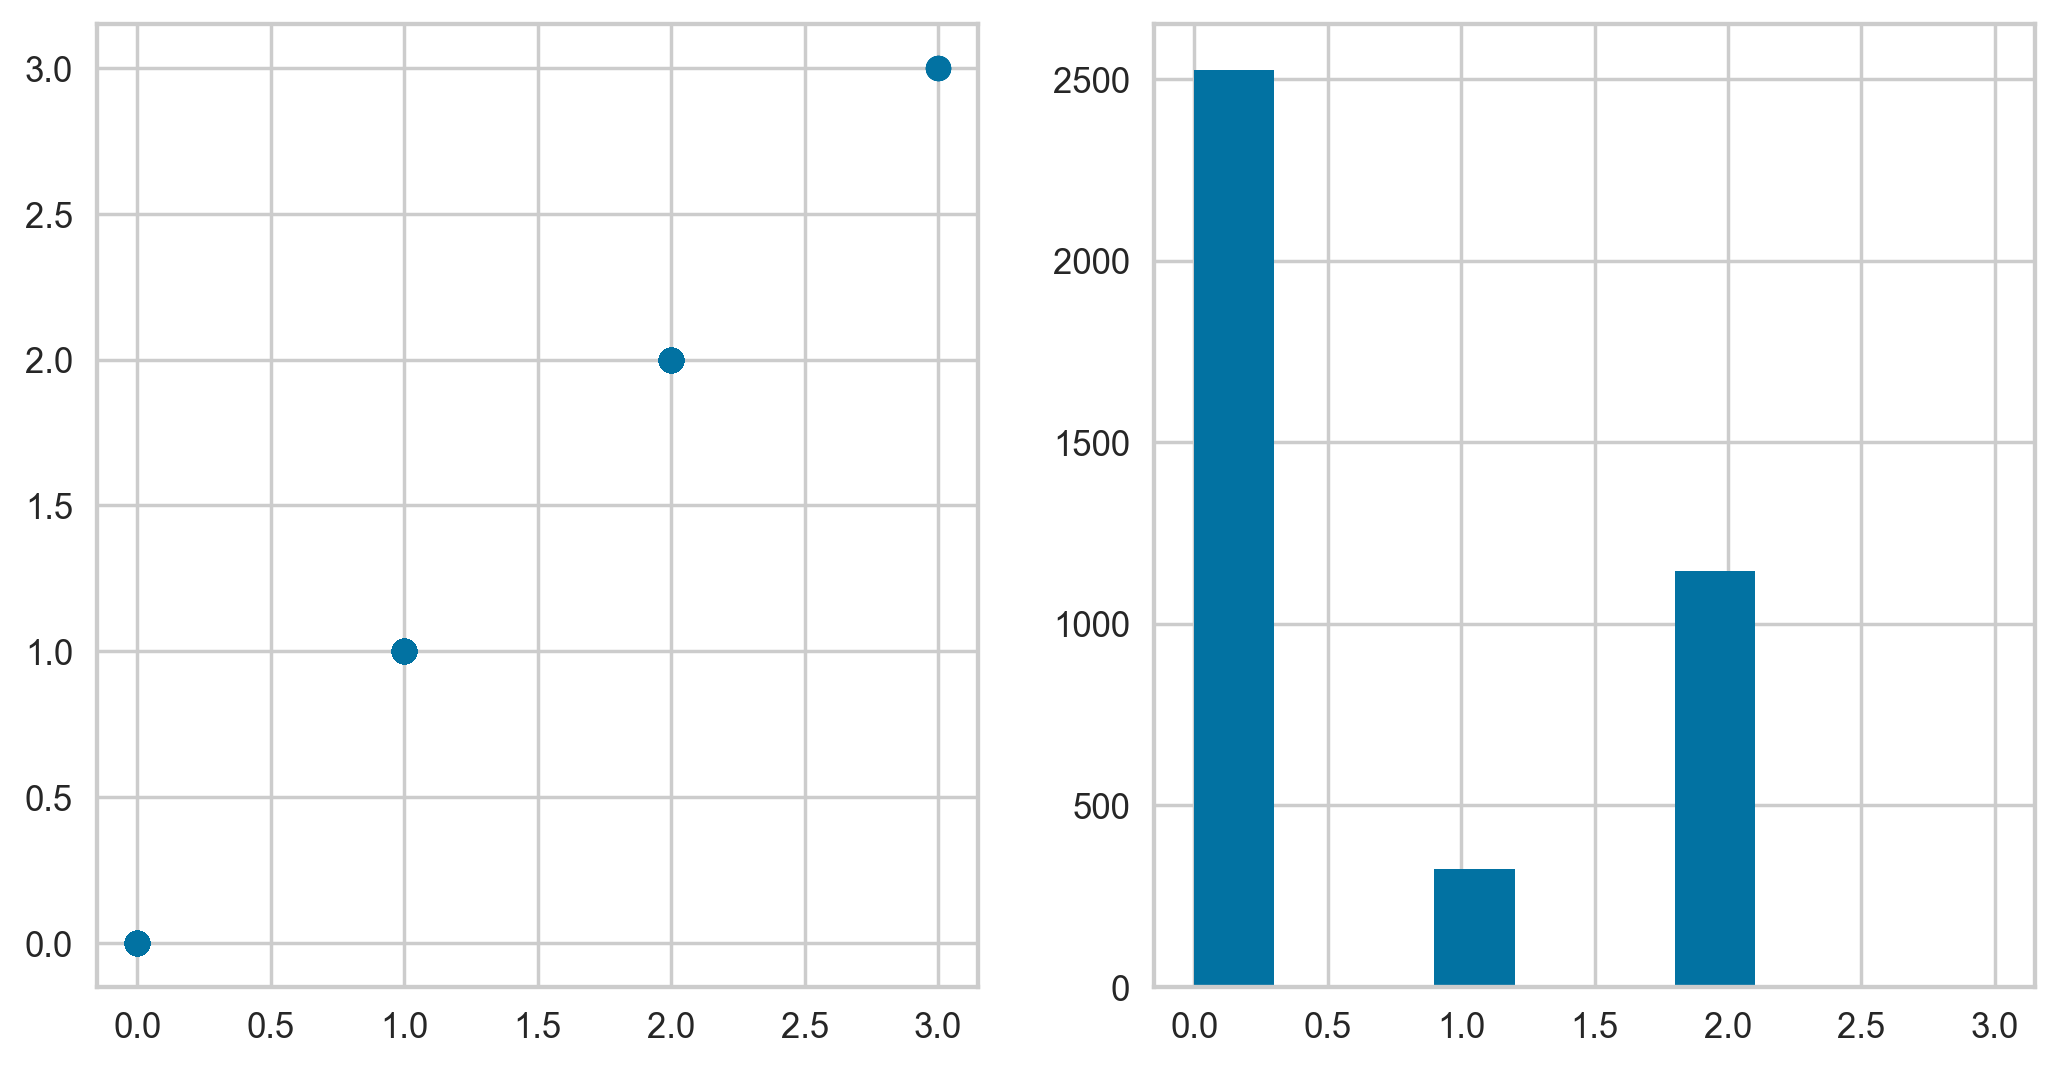

In [22]:
# Extracting features from dataset
x = df.iloc[:,-1]
y = df['HC_cluster']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=250)
ax[0].scatter(x, y)
ax[1].hist(x)
plt.show()

# KMean Clustering :

In [23]:
# Data for KMean clustering
km_data = df.iloc[:,:-1]
km_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [24]:
# Standardizing the dataset
sc = StandardScaler()

scaled_df = pd.DataFrame(sc.fit_transform(km_data),columns=km_data.columns)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)
kmeans.inertia_

27148.665385482618

In [26]:
km = KMeans()
cluster = km.fit_predict(scaled_df)
cluster

array([0, 0, 0, ..., 2, 0, 0])

In [27]:
# within cluster sum of squares
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_df)
    wcss.append(km.inertia_)

In [28]:
wcss

[43978.0,
 35402.34837621174,
 30899.25487374614,
 27157.030545835845,
 23696.130472009278,
 21088.406799284498,
 19163.545248805418,
 17314.499687910306,
 15958.310304463323,
 14725.17850213332,
 13705.103019934266,
 12945.156246251006,
 12427.558718504491,
 11906.750324956967,
 11600.745035471926,
 11057.821926575252,
 10746.890573453622,
 10431.844527991832,
 10115.08533032467]

Text(0, 0.5, 'WCSS')

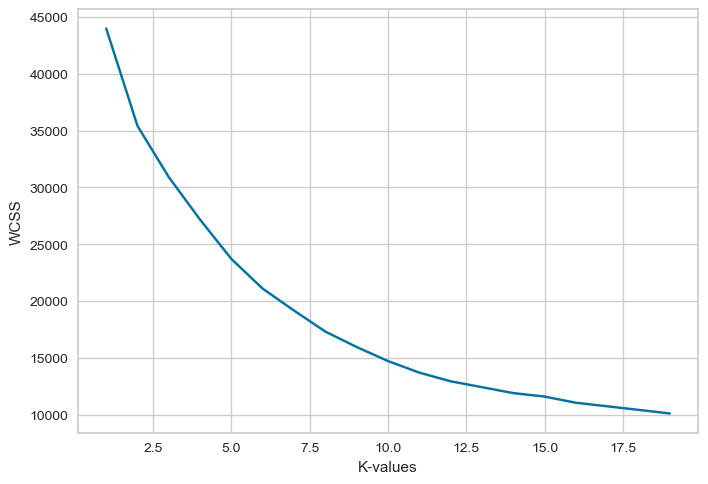

In [29]:
plt.plot(range(1,20), wcss)
plt.xlabel('K-values')
plt.ylabel('WCSS')

In [35]:
km = KMeans(n_clusters=4)
ylabel = km.fit_predict(scaled_df)
ylabel

array([1, 1, 1, ..., 0, 1, 1])

In [31]:
# Checking centers of created KMean clusters
km.cluster_centers_

array([[ 4.21540449e-01, -1.01556886e-02,  1.18751397e+00,
        -8.23930034e-02, -5.47777645e-02,  9.02591791e-01,
         7.40981632e-01, -9.46697706e-02, -1.04757350e-01,
         3.69331266e-01,  5.61687740e-01],
       [-2.98744469e-01, -6.42047941e-02, -6.14421302e-01,
         3.29179329e-02, -6.07500001e-02, -5.18393801e-01,
        -4.91419333e-01, -1.85219666e-01, -1.97785331e-01,
        -2.07796363e-01, -3.48833109e-01],
       [ 1.19905630e+00,  1.02741050e+00,  1.04377305e-01,
         1.38005125e-01, -6.27744600e-02,  6.25735366e-01,
         1.56033307e+00,  3.42662575e+00,  3.68428534e+00,
         2.84986738e-01,  9.18406964e-01],
       [ 6.39500591e-01, -8.44693245e-02,  1.02183982e+00,
        -9.82542913e-02,  1.56443349e+01,  3.17931660e+00,
         1.71441020e+00,  3.32067952e-02,  5.95983297e-02,
         2.39581899e-01,  3.37318153e-01]])

In [36]:
# Adding created KMean clusters in given dataset
km_data["KM_cluster"] = ylabel
km_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KM_cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [37]:
km_data.groupby('KM_cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
KM_cluster,,,,,,,,,,,
0,116112.238504,161.471551,3.693687,1.002338,1.001559,38963.204209,18.731878,337.568200,1.003118,4882.444271,0.646142
1,43657.942406,94.484418,1.217357,1.019329,1.000394,4663.693886,6.899014,200.885602,0.623669,3689.968836,0.201183
2,197666.072727,778.460606,2.169697,1.036364,1.000000,32370.103030,26.987879,5392.836364,15.763636,4733.739394,0.812121
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


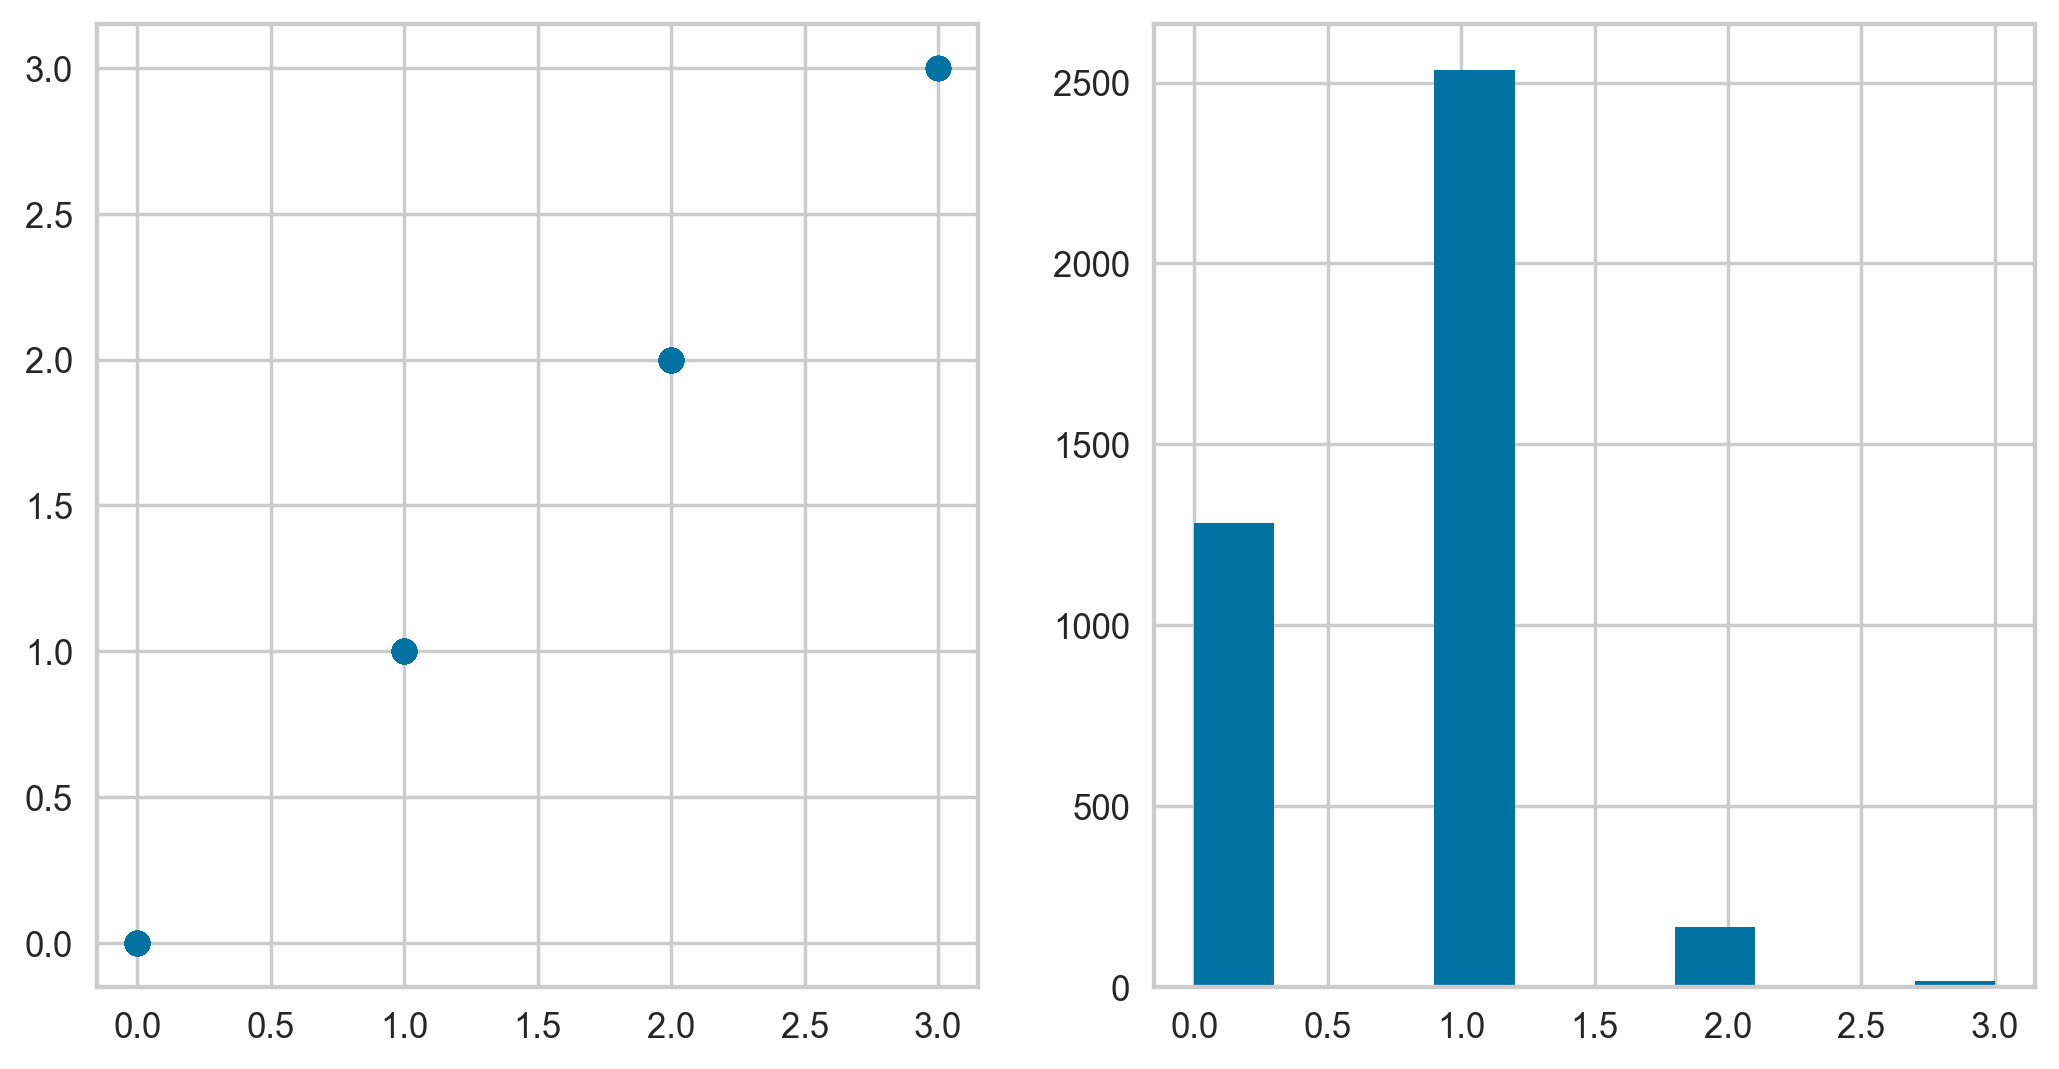

In [47]:
# Extracting features from dataset
x = km_data.iloc[:,-1]
y = km_data['KM_cluster']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=250)
ax[0].scatter(x, y)
ax[1].hist(x)
plt.show()

# DBSCAN :
***[Density Based Spatial Clustering Application with Noise]***

In [40]:
db_data = df.iloc[:,:-1]
db_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [41]:
# Standardizing the dataset
sc = StandardScaler()

scaled_df = pd.DataFrame(sc.fit_transform(db_data),columns=db_data.columns)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


***DBSCAN model building :***

In [42]:
db = DBSCAN()
db.fit_predict(scaled_df)

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [43]:
db = DBSCAN(eps=5, min_samples=5)

y = db.fit_predict(scaled_df)

In [44]:
# Adding created DBSCAN clusters in given dataset
db_data['DB_cluster'] = y
db_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DB_cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [45]:
# Total created DBSCAN clusters & their mean
db_data.groupby('DB_cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
DB_cluster,,,,,,,,,,,
-1,261830.750000,619.000000,2.800000,1.0,2.7,71011.750000,35.000000,5490.200000,14.100000,4201.900000,0.700000
0,72677.426972,143.240204,2.064122,1.0,1.0,16809.169975,11.401272,433.551145,1.301018,4119.635878,0.368448
1,52231.400000,66.666667,1.000000,3.0,1.0,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
2,77793.642857,0.000000,1.214286,2.0,1.0,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857
3,102022.600000,0.000000,3.600000,1.0,4.0,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000


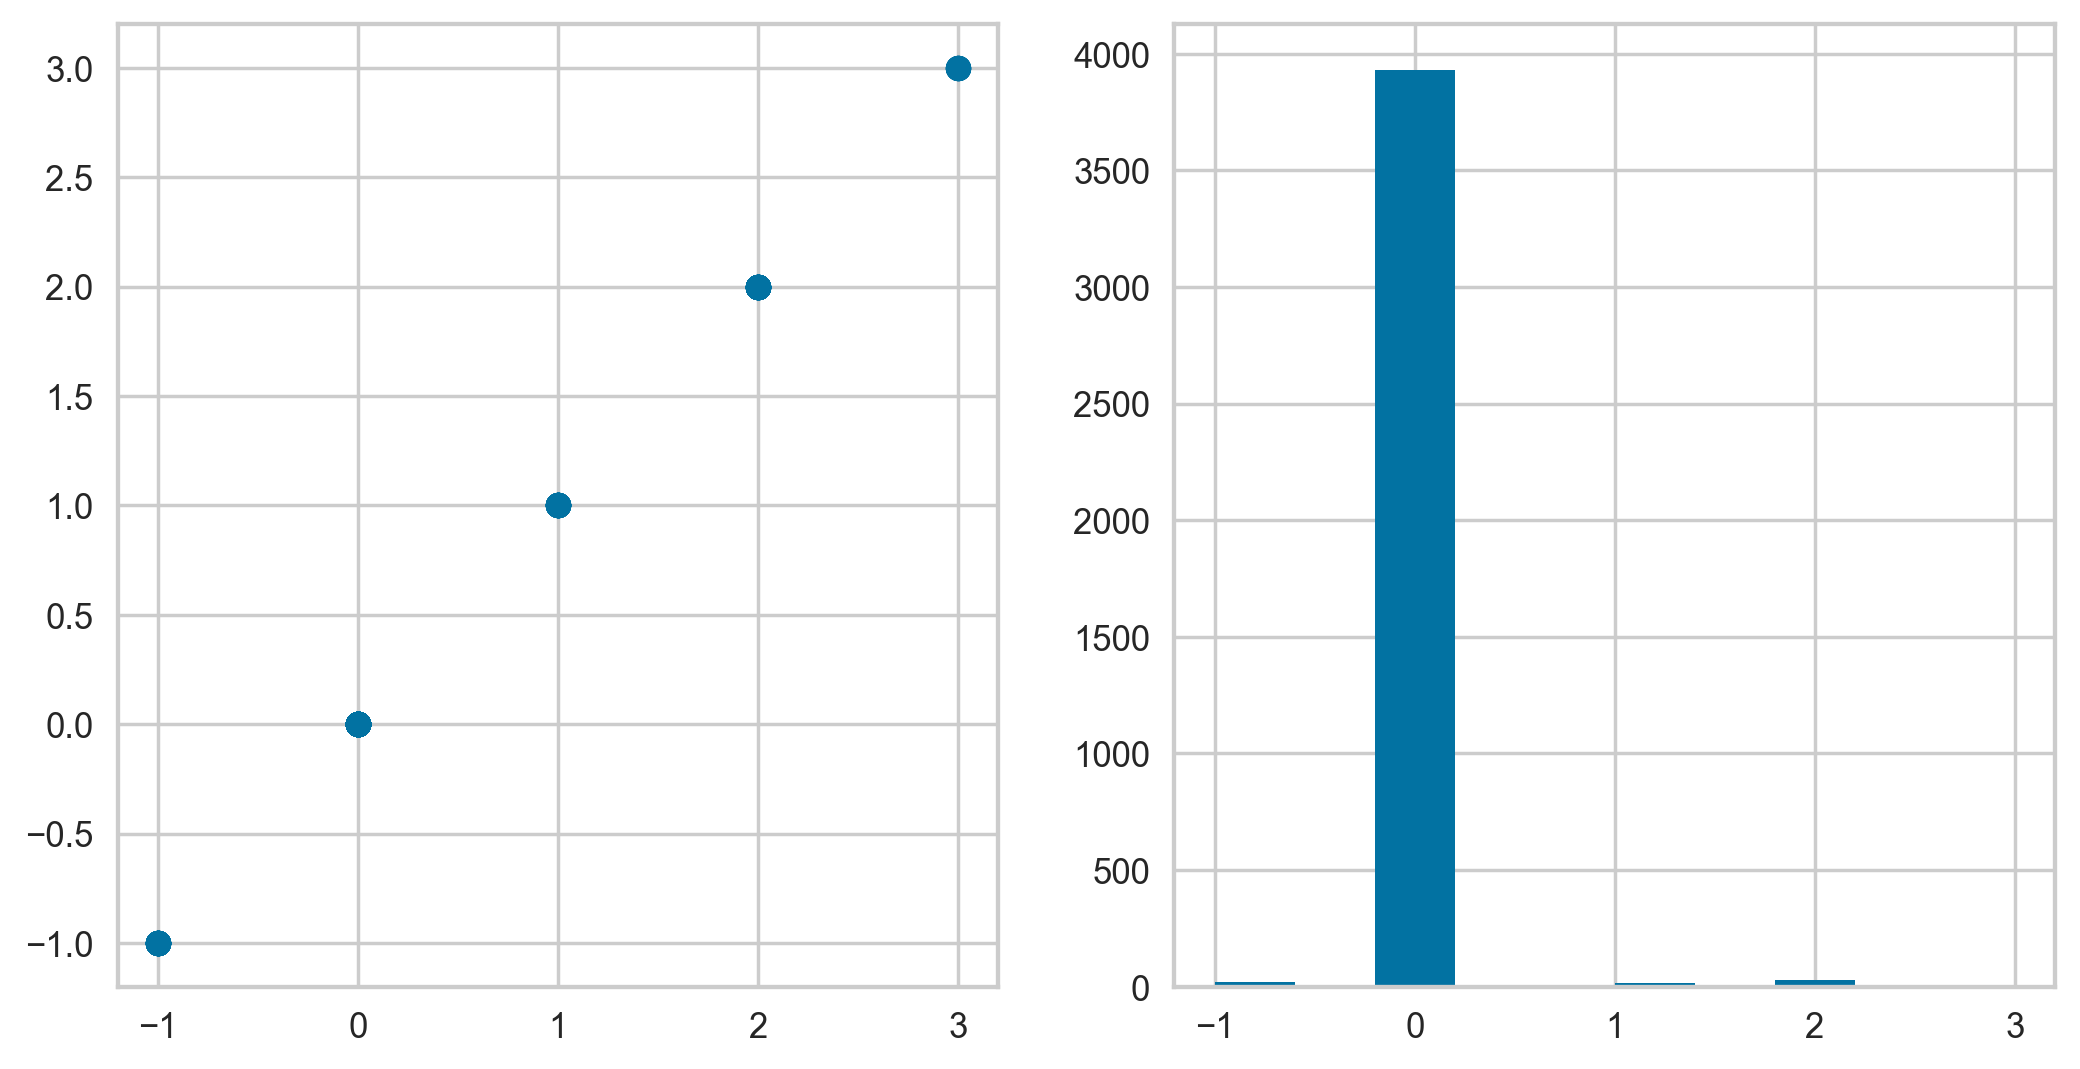

In [46]:
# Extracting features from dataset
x = db_data.iloc[:,-1]
y = db_data['DB_cluster']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=250)
ax[0].scatter(x, y)
ax[1].hist(x)
plt.show()

# Inference :
- 4 Hierarchical clusters obtained from given airline dataset.
- 4 KMeans clusters obtained from given airline dataset.
- 5 DBSCAN clusters obtained from given airline dataset.